## **Econometric Project: Analyzing GDP Growth**

### **Problem Statement**
- Policymakers need insights into the drivers of GDP growth. Specifically, whether investments in education and health translate into significant economic benefits.To analyze how government spending on education and health influences GDP growth while controlling for inflation and trade.

### **1. Load the Dataset**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [5]:
# Load dataset
df = pd.read_csv('C:/Users/Ansela/Downloads/econometric_regression_dataset.csv') 

# Preview the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
     Country  Year  GDP_Growth  Education_Expenditure  Health_Expenditure  \
0  Country_1  2006    3.887512               6.353923            4.182833   
1  Country_2  2019    3.605483               4.704366            9.203290   
2  Country_3  2014    2.279702               3.890306            6.124880   
3  Country_4  2010    2.730066               4.586606            6.382983   
4  Country_5  2007    2.856538               6.567588            4.629215   

   Inflation      Trade  
0   1.402865  27.466253  
1   2.138591  77.384942  
2   1.640848  67.879359  
3   2.452944  35.538959  
4   1.663766  55.313254  


In [6]:
# Check data types and null values
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   GDP_Growth             200 non-null    float64
 3   Education_Expenditure  200 non-null    float64
 4   Health_Expenditure     200 non-null    float64
 5   Inflation              200 non-null    float64
 6   Trade                  200 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.1+ KB
None


In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Year  GDP_Growth  Education_Expenditure  Health_Expenditure  \
count   200.000000  200.000000             200.000000          200.000000   
mean   2008.860000    3.043354               4.979192            7.062673   
std       5.815453    1.002904               1.116938            1.683797   
min    2000.000000    0.681932               3.010380            4.016265   
25%    2004.000000    2.363121               4.033532            5.524410   
50%    2008.000000    2.987068               4.925625            7.215451   
75%    2014.000000    3.609483               5.952276            8.452949   
max    2019.000000    6.253985               6.983326            9.986156   

        Inflation       Trade  
count  200.000000  200.000000  
mean     1.995794   51.008040  
std      0.537958   18.735549  
min      0.215897   20.061769  
25%      1.683982   33.781793  
50%      2.014745   51.721355  
75%      2.376491   69.122359  
max      3.380381   79.780147

### **Step 2: Exploratory Data Analysis (EDA)**

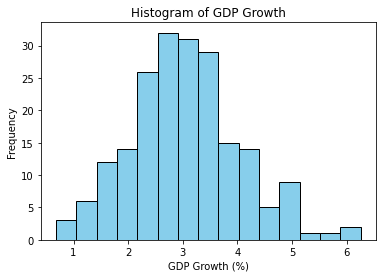

In [9]:
# Histogram of GDP Growth
plt.hist(df["GDP_Growth"], bins=15, color="skyblue", edgecolor="black")
plt.title("Histogram of GDP Growth")
plt.xlabel("GDP Growth (%)")
plt.ylabel("Frequency")
plt.show()

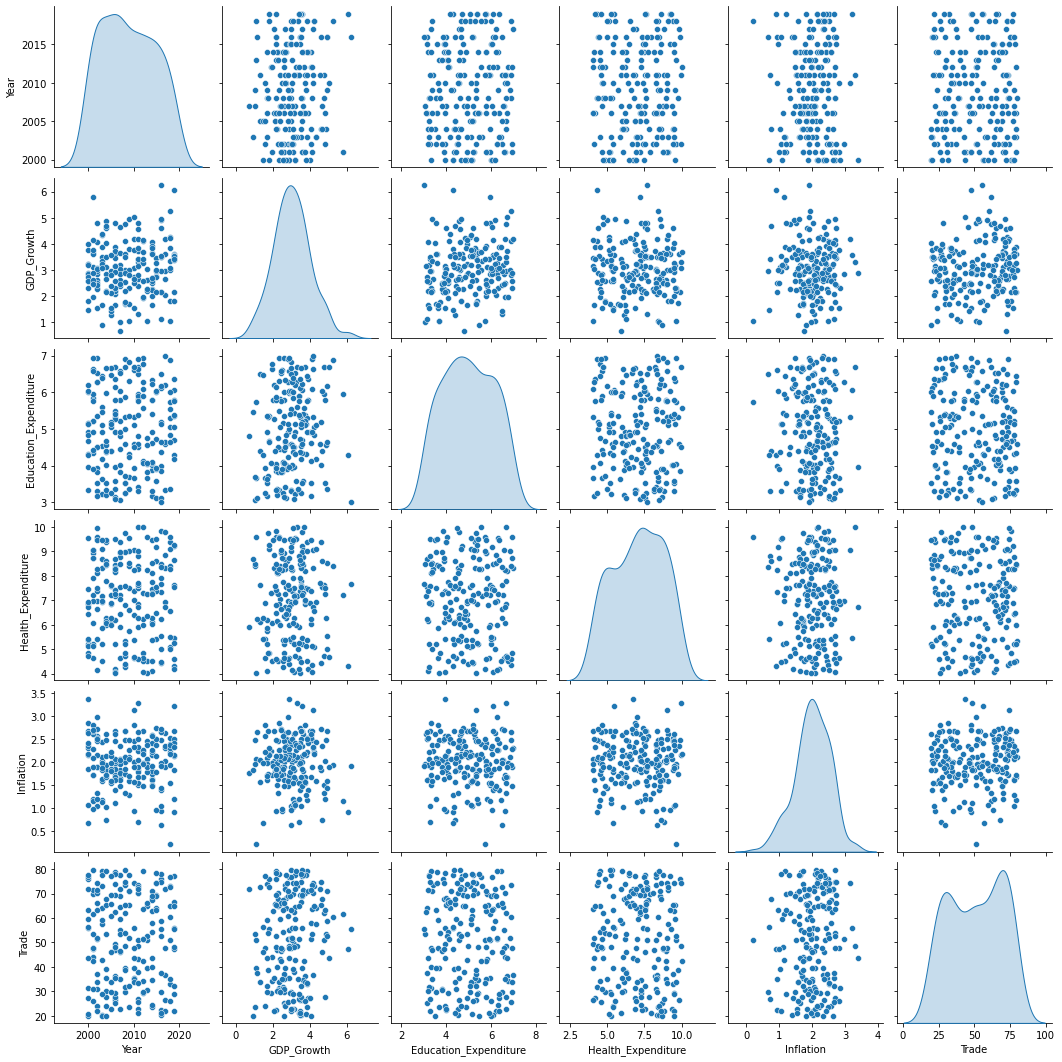

In [10]:
# Pairplot to explore relationships
sns.pairplot(df, diag_kind="kde")
plt.show()

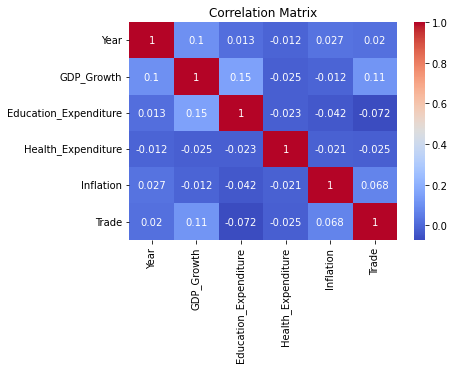

In [11]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### **Step 3: Regression Model Setup**

In [12]:
# Define dependent and independent variables
X = df[["Education_Expenditure", "Health_Expenditure", "Inflation", "Trade"]]
y = df["GDP_Growth"]

In [13]:
# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()


C:\Users\Ansela\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             GDP_Growth   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.025
Date:                Tue, 14 Jan 2025   Prob (F-statistic):             0.0925
Time:                        19:48:47   Log-Likelihood:                -279.80
No. Observations:                 200   AIC:                             569.6
Df Residuals:                     195   BIC:                             586.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.10

### **Step 4: Model Diagnostics**

**4.1 Multicollinearity**

In [15]:
# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
                 Feature        VIF
0                  const  64.108320
1  Education_Expenditure   1.007227
2     Health_Expenditure   1.001650
3              Inflation   1.006470
4                  Trade   1.010144


**4.2 Heteroskedasticity**

In [16]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, X)
print("\nBreusch-Pagan Test p-value:", bp_test[1])


Breusch-Pagan Test p-value: 0.10626720383908045


**4.3 Autocorrelation**

In [17]:
# Durbin-Watson test
dw_stat = durbin_watson(model.resid)
print("\nDurbin-Watson Statistic:", dw_stat)


Durbin-Watson Statistic: 2.1117991042378095


**4.4 Residual Analysis**

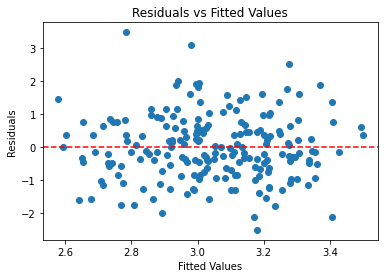

In [18]:
# Residual vs Fitted Values plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

C:\Users\Ansela\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


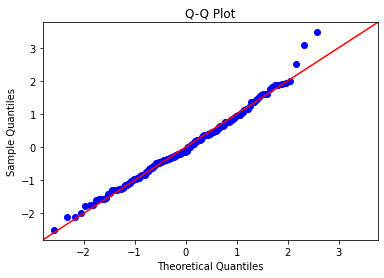

In [19]:
# Q-Q Plot for normality
sm.qqplot(model.resid, line="45")
plt.title("Q-Q Plot")
plt.show()

### **Step 5: Interpretation of Results**


In [20]:
print("\nModel Interpretation:")
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")
print("Significant Variables (p < 0.05):")
print(model.pvalues[model.pvalues < 0.05])


Model Interpretation:
R-squared: 0.0398726375177072
Adjusted R-squared: 0.02017771726166029
Significant Variables (p < 0.05):
const                    0.000232
Education_Expenditure    0.023230
dtype: float64


### **Step 6: Policy Implications**

In [32]:
model.params["Inflation"]

-0.026915418485703557

In [33]:
model.params["Trade"]

0.006793672953947739

In [34]:
model.params["Health_Expenditure"]

-0.011031543320782183

In [35]:
model.params["Education_Expenditure"]

0.1446553106725874

In [21]:
# Policy Implications based on regression results
if model.pvalues["Education_Expenditure"] < 0.05:
    print("\nPolicy Implication: Education expenditure has a statistically significant positive impact on GDP growth. Investing more in education can stimulate economic growth.")
if model.pvalues["Health_Expenditure"] < 0.05:
    print("Policy Implication: Health expenditure also has a significant positive effect on GDP growth. More health spending can improve productivity and growth.")
if model.pvalues["Inflation"] < 0.05:
    print("Policy Implication: High inflation negatively affects GDP growth. Efforts to control inflation may enhance economic performance.")



Policy Implication: Education expenditure has a statistically significant positive impact on GDP growth. Investing more in education can stimulate economic growth.


In [23]:
# Policy Implications based on regression results
if model.pvalues["Education_Expenditure"] < 0.05:
    print("\nPolicy Implication: Education expenditure has a statistically significant positive impact on GDP growth. Investing more in education can stimulate economic growth. Policies should focus on improving access to quality education and increasing funding for research and development.")

if model.pvalues["Health_Expenditure"] < 0.05:
    print("\nPolicy Implication: Health expenditure has a statistically significant positive effect on GDP growth. More spending on healthcare improves workforce productivity and reduces absenteeism. Policies should prioritize preventive care and universal healthcare access.")

if model.pvalues["Inflation"] < 0.05:
    if model.params["Inflation"] > 0:
        print("\nPolicy Implication: Moderate inflation can positively impact GDP growth by encouraging spending and investment. Policies should ensure inflation remains within a stable and controlled range.")
    else:
        print("\nPolicy Implication: High inflation negatively impacts GDP growth by reducing consumer purchasing power and business investments. Efforts to control inflation through monetary policies, such as adjusting interest rates, are necessary to stabilize the economy.")

if model.pvalues["Trade"] < 0.05:
    if model.params["Trade"] > 0:
        print("\nPolicy Implication: Trade openness positively influences GDP growth. Policies that promote export-driven industries, strengthen international trade agreements, and reduce tariffs can enhance economic performance.")
    else:
        print("\nPolicy Implication: Excessive reliance on imports or unfavorable trade balances may hinder GDP growth. Policies should focus on supporting domestic industries and improving trade competitiveness.")




Policy Implication: Education expenditure has a statistically significant positive impact on GDP growth. Investing more in education can stimulate economic growth. Policies should focus on improving access to quality education and increasing funding for research and development.


In [24]:
# Comprehensive recommendations if multiple variables are significant
significant_vars = [var for var in model.pvalues.index if model.pvalues[var] < 0.05 and var != "const"]

if "Education_Expenditure" in significant_vars and "Health_Expenditure" in significant_vars:
    print("\nPolicy Implication: A combined focus on education and healthcare expenditures can significantly boost GDP growth. Governments should adopt a human capital development strategy to build a productive and skilled workforce.")

if "Inflation" in significant_vars and model.params["Inflation"] < 0:
    print("\nPolicy Implication: High inflation, combined with other significant variables, suggests a need for balanced fiscal and monetary policies to stabilize the economy without undermining growth.")

if "Trade" in significant_vars and model.params["Trade"] > 0:
    print("\nPolicy Implication: Trade openness, along with education and healthcare spending, forms a strong foundation for economic growth. Policies should integrate trade expansion with human capital investment to achieve long-term growth.")

# General message for insignificant variables
insignificant_vars = [var for var in model.pvalues.index if model.pvalues[var] >= 0.05 and var != "const"]

for var in insignificant_vars:
    print(f"\nPolicy Implication: The variable '{var}' is not statistically significant in explaining GDP growth. Policymakers should reassess its role and consider its broader economic context.")


Policy Implication: The variable 'Health_Expenditure' is not statistically significant in explaining GDP growth. Policymakers should reassess its role and consider its broader economic context.

Policy Implication: The variable 'Inflation' is not statistically significant in explaining GDP growth. Policymakers should reassess its role and consider its broader economic context.

Policy Implication: The variable 'Trade' is not statistically significant in explaining GDP growth. Policymakers should reassess its role and consider its broader economic context.
